# Restaurant Revenue Prediction

## Data preprocessing/EDA

This Kaggle dataset consists of 137 restaurants in the training set and a test set with 100000 restaurants. The goal is to predict the revenue of the restaurants. The data columns are obfuscated other than the date that it was open, the city, the size of the city, and the type of restaurant. The information also states that the revenue in the training set is transformed to also be obfuscated.

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import datetime
import pickle

In [18]:
###FOR KAGGLE VM
# import os
# print(os.listdir("../input"))
# df = pd.read_csv("../input/train.csv")
# test_df = pd.read_csv("../input/test.csv")


#load csv data
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# # load pickle data called test.pkl
# with open('train.pkl', 'rb') as f:
#     data = pickle.load(f)
# with open('test.pkl', 'rb') as f:
#     test_data = pickle.load(f)

# # convert to pandas dataframe
# df = pd.DataFrame(data)
# test_df = pd.DataFrame(test_data)

In [19]:
print("Training data shape: ", df.shape)
print("Test data shape: ", test_df.shape)
print("Training data columns: ", df.columns)
print("Test data columns: ", test_df.columns)

Training data shape:  (137, 43)
Test data shape:  (100000, 42)
Training data columns:  Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')
Test data columns:  Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37'],
      dtype='object')


In [20]:
df.head()  # View the first few rows

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [21]:
test_df.head()  # View the first few rows

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


Sanity check to see if the test has same columns as train

In [22]:
df.info()  # column names and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [23]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          100000 non-null  int64  
 1   Open Date   100000 non-null  object 
 2   City        100000 non-null  object 
 3   City Group  100000 non-null  object 
 4   Type        100000 non-null  object 
 5   P1          100000 non-null  int64  
 6   P2          100000 non-null  float64
 7   P3          100000 non-null  float64
 8   P4          100000 non-null  float64
 9   P5          100000 non-null  int64  
 10  P6          100000 non-null  int64  
 11  P7          100000 non-null  int64  
 12  P8          100000 non-null  int64  
 13  P9          100000 non-null  int64  
 14  P10         100000 non-null  int64  
 15  P11         100000 non-null  int64  
 16  P12         100000 non-null  int64  
 17  P13         100000 non-null  float64
 18  P14         100000 non-null  int64  
 19  P15

Going to turn the opening date into a continuous variable by converting it to the number of years since each restaurant opened.

In [24]:
df['Open Date'] = pd.to_datetime(df['Open Date'])
test_df['Open Date'] = pd.to_datetime(test_df['Open Date'])

# convert the Open date to number of days open (May 8, 2015 - Open Date)
# got the date from the initial welcome message from the discussion page
comp_date = datetime.datetime(2015, 5, 8)

# scale days open to years open
df['Years Open'] = (comp_date - df['Open Date']).dt.days / 365
test_df['Years Open'] = (comp_date - test_df['Open Date']).dt.days / 365

In [25]:
df['City'].value_counts()

City
İstanbul          50
Ankara            19
İzmir              9
Bursa              5
Samsun             5
Sakarya            4
Antalya            4
Kayseri            3
Eskişehir          3
Adana              3
Diyarbakır         3
Tekirdağ           3
Muğla              2
Trabzon            2
Aydın              2
Konya              2
Karabük            1
Isparta            1
Bolu               1
Kütahya            1
Amasya             1
Balıkesir          1
Denizli            1
Kocaeli            1
Kırklareli         1
Edirne             1
Uşak               1
Kastamonu          1
Tokat              1
Şanlıurfa          1
Elazığ             1
Gaziantep          1
Afyonkarahisar     1
Osmaniye           1
Name: count, dtype: int64

In [26]:
test_df['City'].value_counts()

City
İstanbul          34087
Ankara             8720
İzmir              6465
Antalya            5911
Kocaeli            4364
Mersin             2735
Adana              2514
Balıkesir          2463
Bursa              2441
Muğla              1823
Aydın              1617
Tekirdağ           1577
Konya              1576
Gaziantep          1487
Edirne             1230
Manisa             1227
Çanakkale           965
Denizli             964
Diyarbakır          954
Hatay               951
Zonguldak           926
Eskişehir           900
Trabzon             660
Aksaray             650
Bolu                631
Yalova              630
Kırıkkale           622
Malatya             616
Mardin              610
Şanlıurfa           609
Batman              604
Sakarya             604
Rize                345
Artvin              344
Bilecik             339
Afyonkarahisar      331
Nevşehir            328
Sivas               326
Samsun              324
Kayseri             323
Erzincan            319
Kırşehir   

Too many cities to one-hot-encode with not much information gain. Rather grouping by city size and type of restaurant.

Dropping columns that are not useful

In [27]:
df = df.drop(['Id', 'Open Date', 'City'], axis=1)
 # too many cities to one-hot encode, guessing the city is not a good predictor of revenue since generalizing to city type is enough

test_df = test_df.drop(['Id', 'Open Date', 'City'], axis=1)

print(f"for train data:\n{df['City Group'].value_counts()}")
print(f"for test data:\n{test_df['City Group'].value_counts()}")
print(f"for train data:\n{df['Type'].value_counts()}")
print(f"for test data:\n{test_df['Type'].value_counts()}")

for train data:
City Group
Big Cities    78
Other         59
Name: count, dtype: int64
for test data:
City Group
Other         50728
Big Cities    49272
Name: count, dtype: int64
for train data:
Type
FC    76
IL    60
DT     1
Name: count, dtype: int64
for test data:
Type
FC    57019
IL    40447
DT     2244
MB      290
Name: count, dtype: int64


considering that the test set doesn't even have any instances of MB, and that there are less than 1 percent of the test set that are of this type, we can merge this column with DT.

Also Performing one-hot encoding on the city and type columns

In [28]:
df = pd.get_dummies(df, columns=['City Group', 'Type'])
test_df = pd.get_dummies(test_df, columns=['City Group', 'Type'])

test_df['Type_DT'] = test_df['Type_DT'] + test_df['Type_MB']
test_df = test_df.drop('Type_MB', axis=1)

Visualizing distribution of variables

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


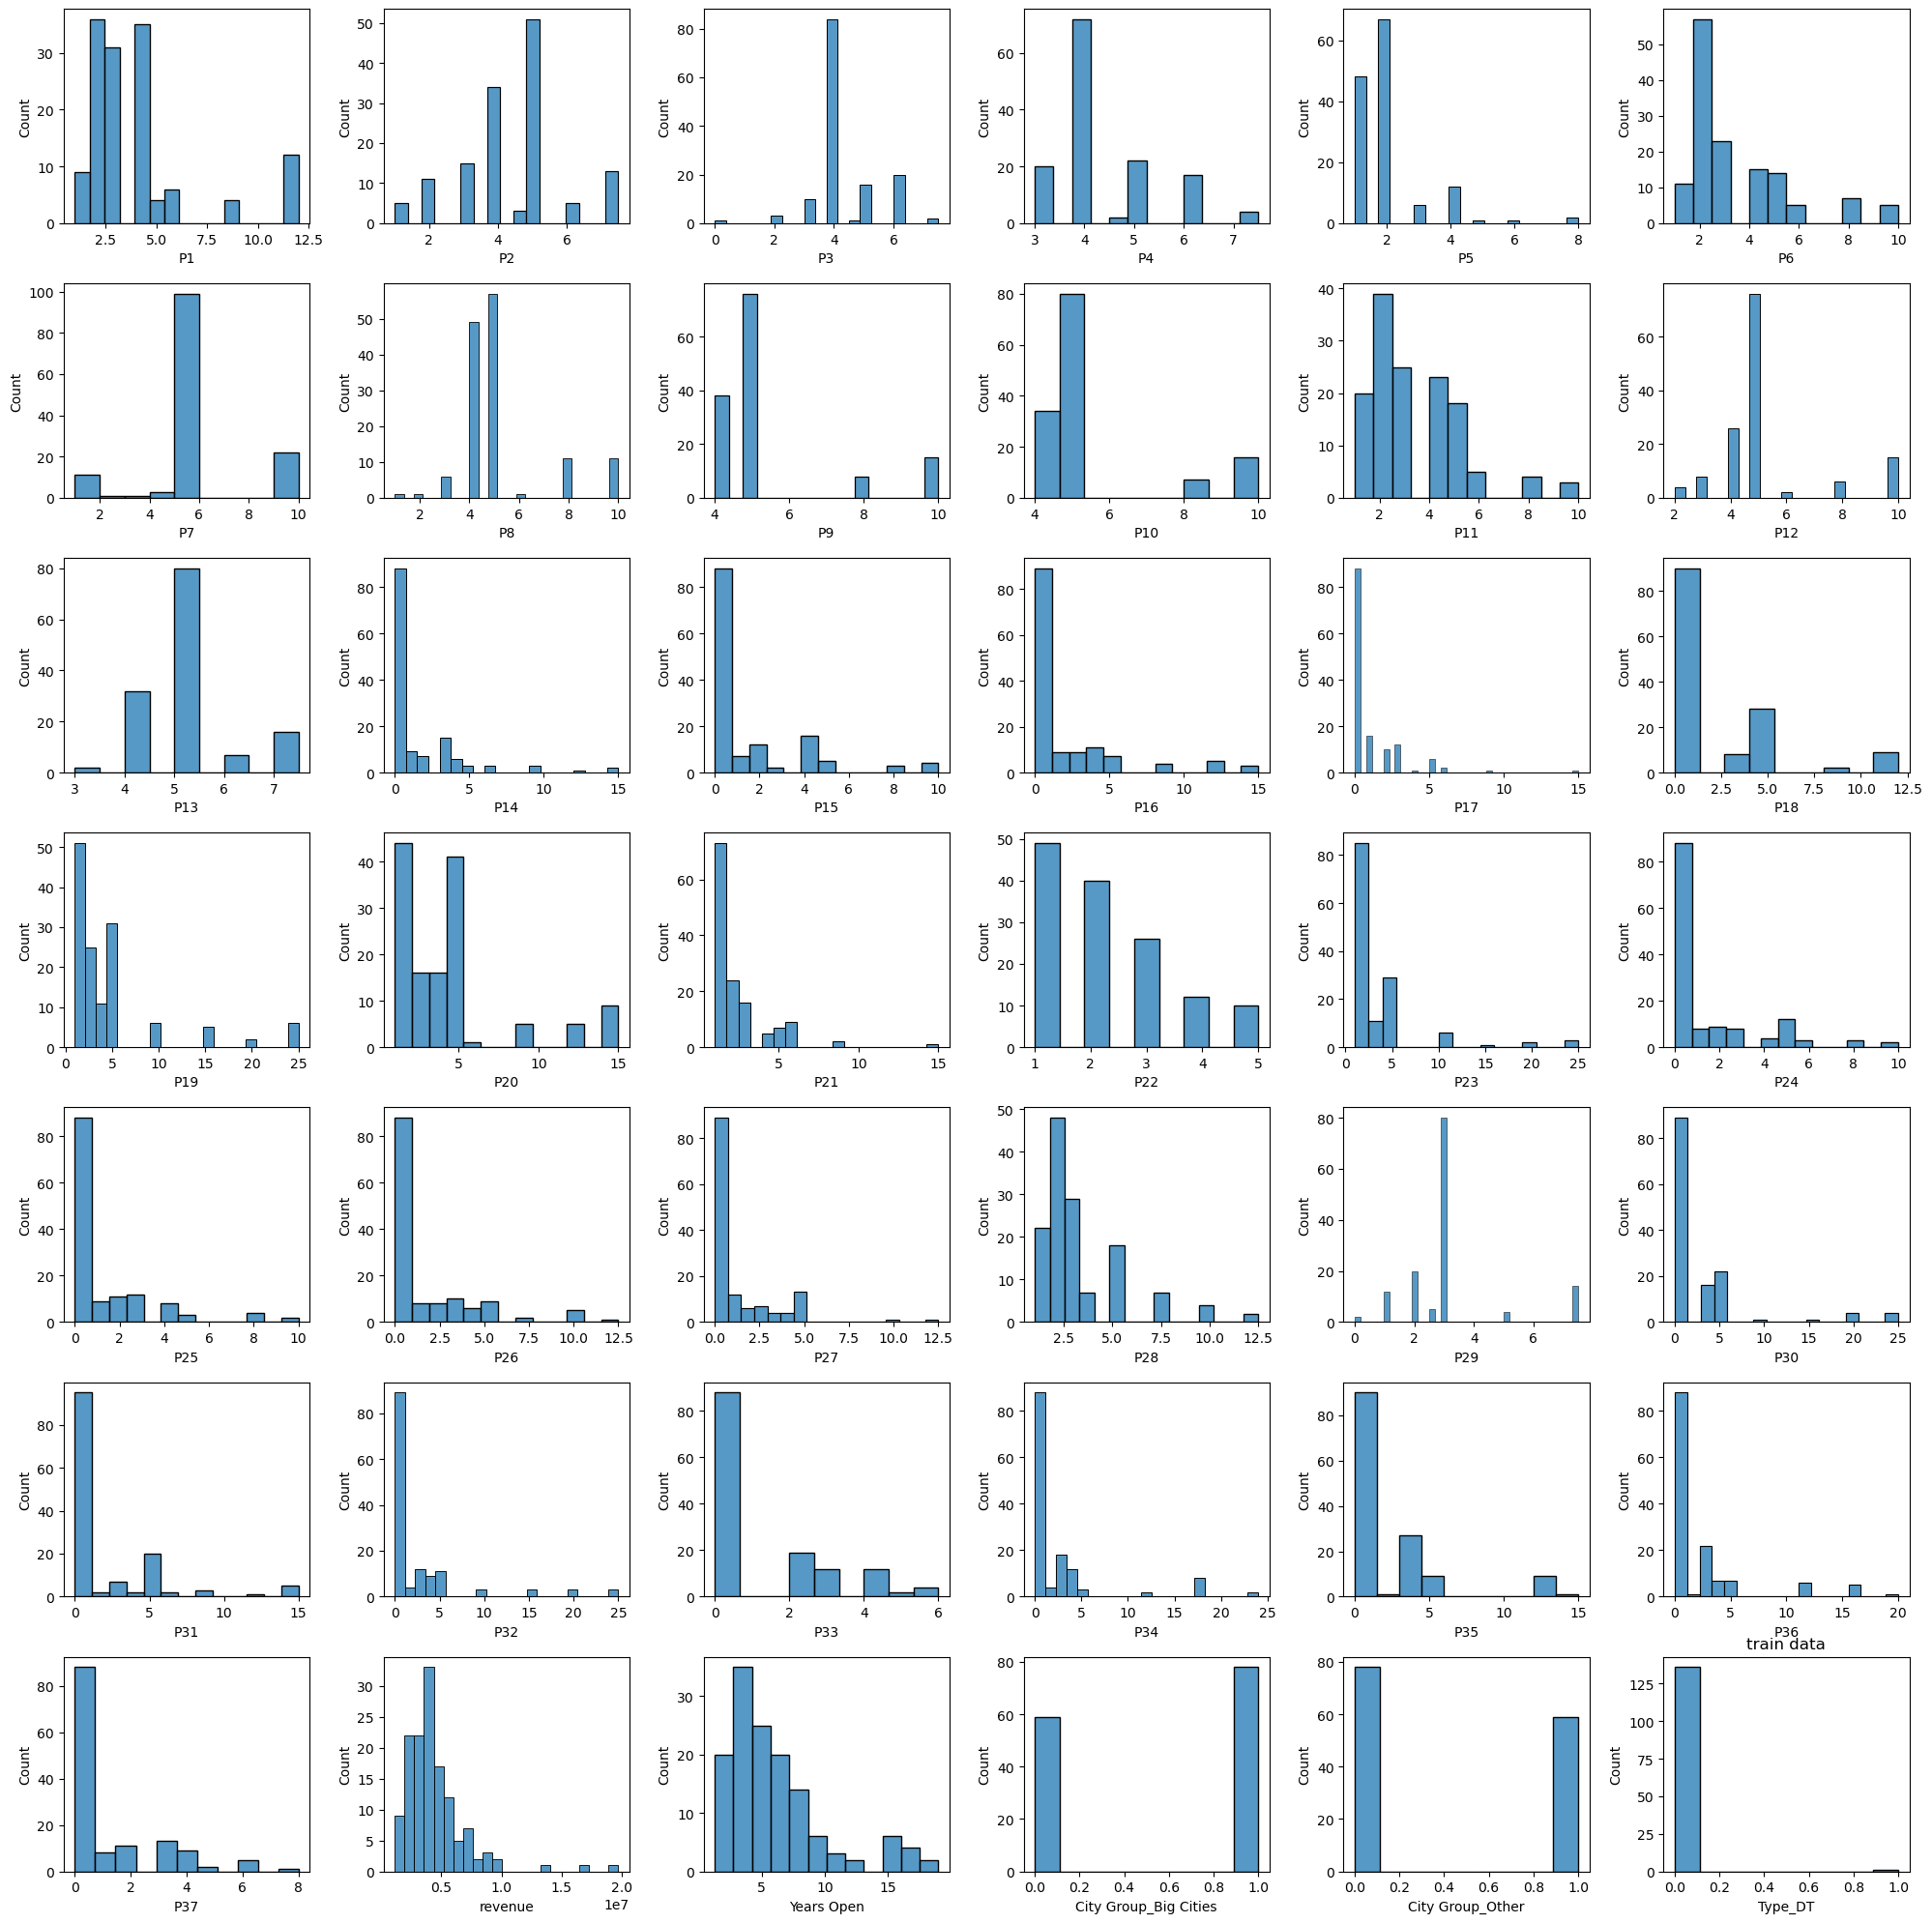

In [29]:
fig, axes = plt.subplots(7, 6, figsize=(20, 20))
for i, ax in enumerate(axes.flatten()):
    if i < len(df.columns):
        sns.histplot(df[df.columns[i]], ax=ax)
plt.tight_layout()
plt.title('train data')
plt.show()

the revenue is skewed to the right, so we will take the log of it to make it more normally distributed

<Axes: xlabel='revenue', ylabel='Count'>

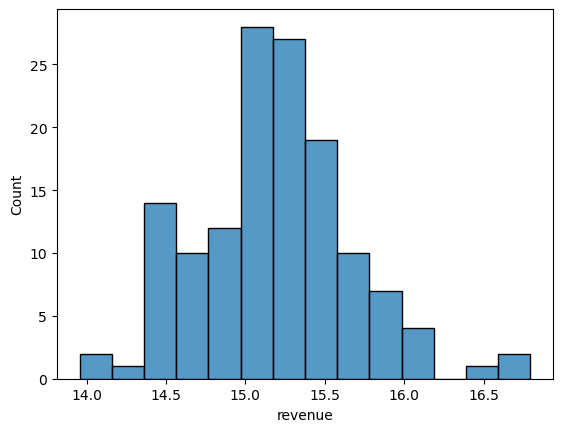

In [30]:
df['revenue'] = np.log1p(df['revenue'])
sns.histplot(df['revenue'])

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


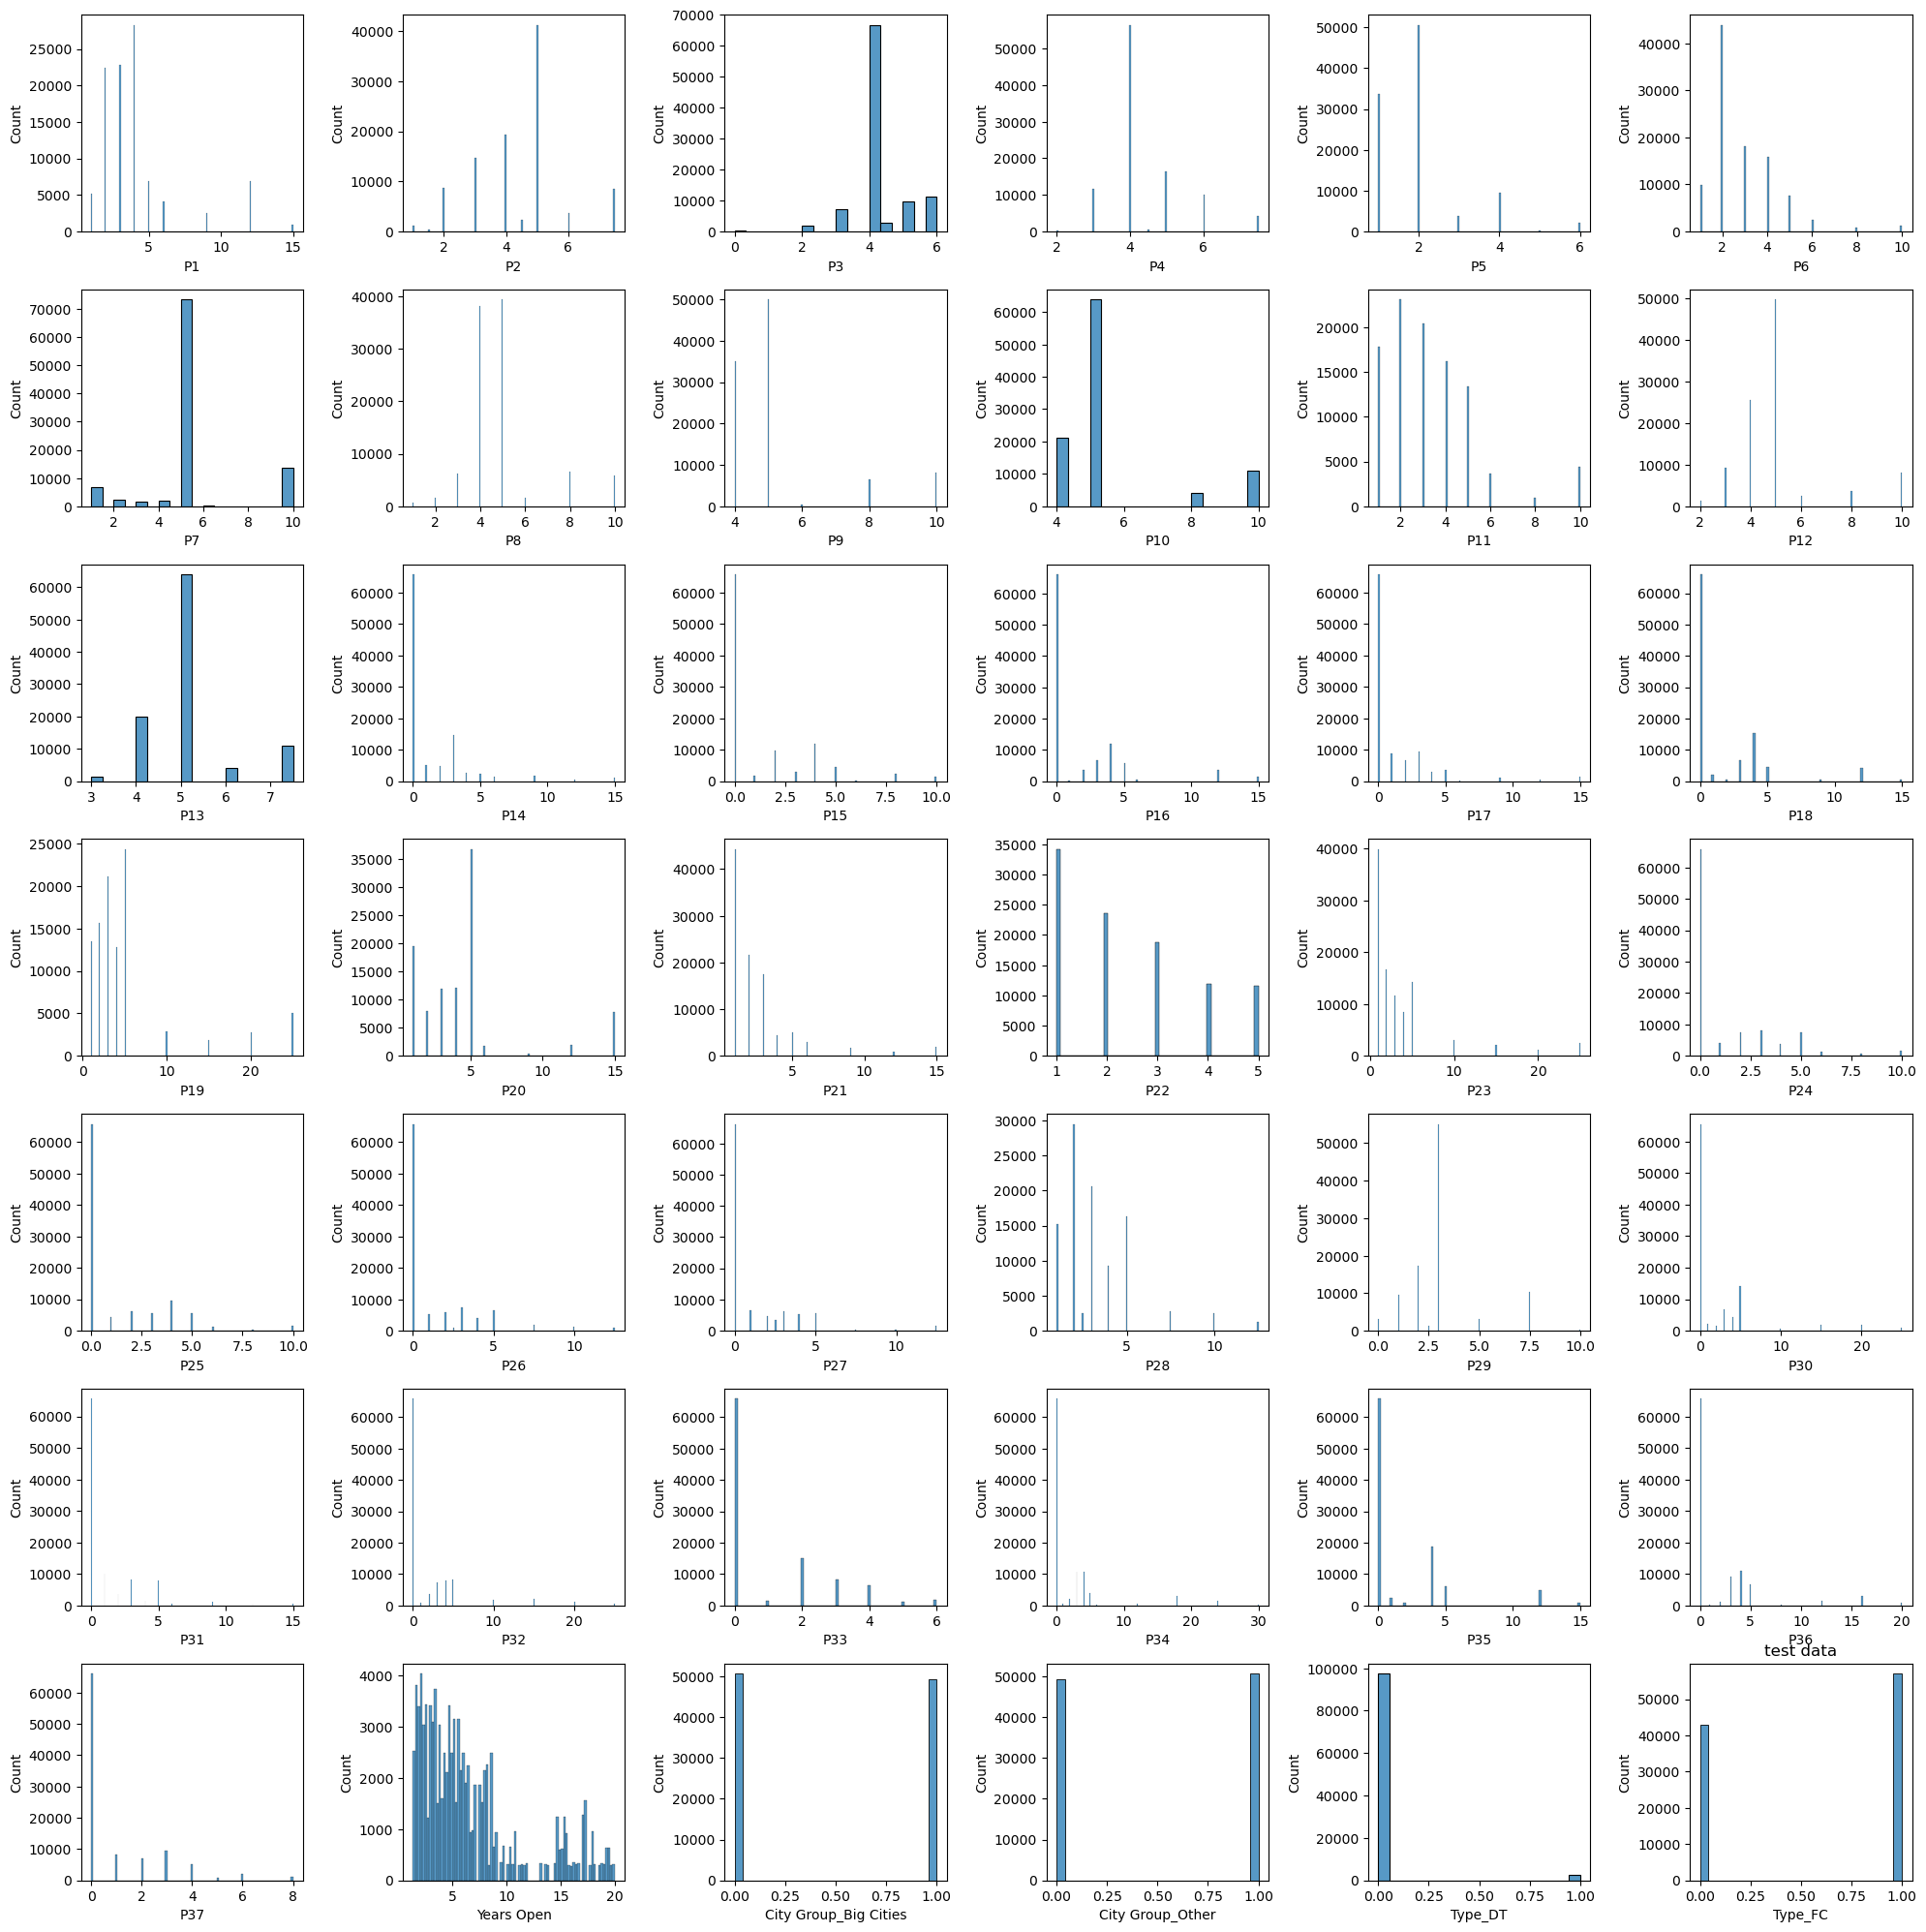

In [31]:
fig, axes = plt.subplots(7, 6, figsize=(20, 20))
for i, ax in enumerate(axes.flatten()):
    if i < len(test_df.columns):
        sns.histplot(test_df[test_df.columns[i]], ax=ax)
plt.tight_layout()
plt.title('test data')
plt.show()

We can guess that more restaurants are being opened in recent years due to many different social and economic factors across all other variables. My initial guess is that the revenue will be higher for more established restaurants with more years of experience.

Assuming that the high number of 0 vals in some of the hidden columns are actually NaNs. We will replace them with the estimated values with MICE imputation (IterativeImputer). Works by modeling each feature with missing values as a function of other features in a round-robin fashion. The features are then estimated sequentially.

In [32]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp_train = IterativeImputer(max_iter=20, missing_values=0, sample_posterior=True, min_value=1, random_state=42)
imp_test = IterativeImputer(max_iter=20, missing_values=0, sample_posterior=True, min_value=1, random_state=42)

p_data = ['P'+str(i) for i in range(1,38)]
df[p_data] = np.round(imp_train.fit_transform(df[p_data]))
test_df[p_data] = np.round(imp_test.fit_transform(test_df[p_data]))

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
P1,137.0,4.014599,2.910391,1.000000,2.000000,3.000000,4.000000,12.000000
P2,137.0,4.445255,1.617549,1.000000,4.000000,5.000000,5.000000,8.000000
P3,137.0,4.343066,0.995859,2.000000,4.000000,4.000000,5.000000,8.000000
P4,137.0,4.379562,1.065028,3.000000,4.000000,4.000000,5.000000,8.000000
P5,137.0,2.007299,1.209620,1.000000,1.000000,2.000000,2.000000,8.000000
P6,137.0,3.357664,2.134235,1.000000,2.000000,3.000000,4.000000,10.000000
P7,137.0,5.423358,2.296809,1.000000,5.000000,5.000000,5.000000,10.000000
P8,137.0,5.153285,1.858567,1.000000,4.000000,5.000000,5.000000,10.000000
P9,137.0,5.445255,1.834793,4.000000,4.000000,5.000000,5.000000,10.000000
P10,137.0,5.489051,1.847561,4.000000,5.000000,5.000000,5.000000,10.000000


store preprocessed data

In [34]:
df.to_pickle('train_processed.pkl')
test_df.to_pickle('test_processed.pkl')

In [35]:
# #load pickle data called test.pkl
# with open('train_processed.pkl', 'rb') as f:
#     data = pickle.load(f)
# with open('test_processed.pkl', 'rb') as f:
#     test_data = pickle.load(f)
    
# # convert to pandas dataframe
# df = pd.DataFrame(data)
# test_df = pd.DataFrame(test_data)

In [36]:
X = df.drop(['revenue'], axis=1)
y = df['revenue']

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# turn to dataframe
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X.columns)

## Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

Define function that predicts and prints the scores of each model, make dictionary to store scores

In [58]:
from sklearn.metrics import mean_squared_error, r2_score



def print_scores(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_pred)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print('Train r2 score: ', train_r2)
    print('Test r2 score: ', test_r2)
    print(f'Train RMSE: {train_rmse:.4f}')
    print(f'Test RMSE: {test_rmse:.4f}')

    # return score to print later as a table with name of model and respective scores
    return [train_r2, test_r2, train_rmse, test_rmse]

store_scores = {}
store_scores.update({'Linear Regression': print_scores(lin_model, X_train, y_train, X_test, y_test)})

Train r2 score:  0.4241217032997723
Test r2 score:  -0.20155374496818568
Train RMSE: 0.3491
Test RMSE: 0.5985


## Ridge Regression
Will be using RidgeCV to automatically find the best alpha value based on cross validation

In [59]:
from sklearn.linear_model import RidgeCV

ridge_model = RidgeCV(alphas=np.logspace(2, 3, 1000)) # values from 100 to 1000
ridge_model.fit(X_train, y_train)

print(f'Best alpha: {ridge_model.alpha_:.2f}')

store_scores.update({'Ridge Regression': print_scores(ridge_model, X_train, y_train, X_test, y_test)})


Best alpha: 448.39
Train r2 score:  0.10269349894374025
Test r2 score:  0.05917145935001211
Train RMSE: 0.4358
Test RMSE: 0.5296


### Ridge Regression Feature Importance Analysis

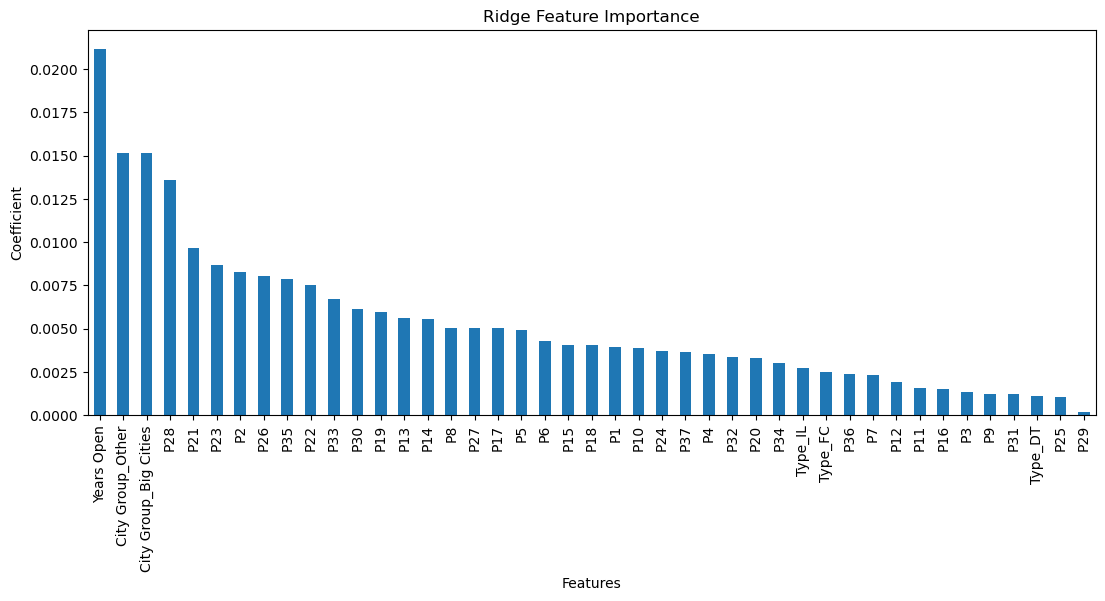

In [60]:
ridge_feature_coef = pd.Series(index=X_train.columns, data=np.abs(ridge_model.coef_))
sorted_coef = ridge_feature_coef.sort_values(ascending=False)

plt.figure(figsize=(13, 5))
plt.title('Ridge Feature Importance')
plt.xlabel('Features')
plt.ylabel('Coefficient')
sorted_coef.plot(kind='bar')
plt.show()

## Lasso Regression

Will be using LassoCV to automatically find the best alpha value based on cross validation

In [61]:
from sklearn.linear_model import LassoCV

lasso_model = LassoCV(alphas=np.logspace(-2, 2, 1000), random_state=42)
lasso_model.fit(X_train, y_train)

print(f'best alpha: {lasso_model.alpha_:.2f}')

store_scores.update({'Lasso Regression': print_scores(lasso_model, X_train, y_train, X_test, y_test)})

best alpha: 0.05
Train r2 score:  0.10859936655459423
Test r2 score:  0.12444422397499699
Train RMSE: 0.4344
Test RMSE: 0.5109


### Lasso Model Feature Importance

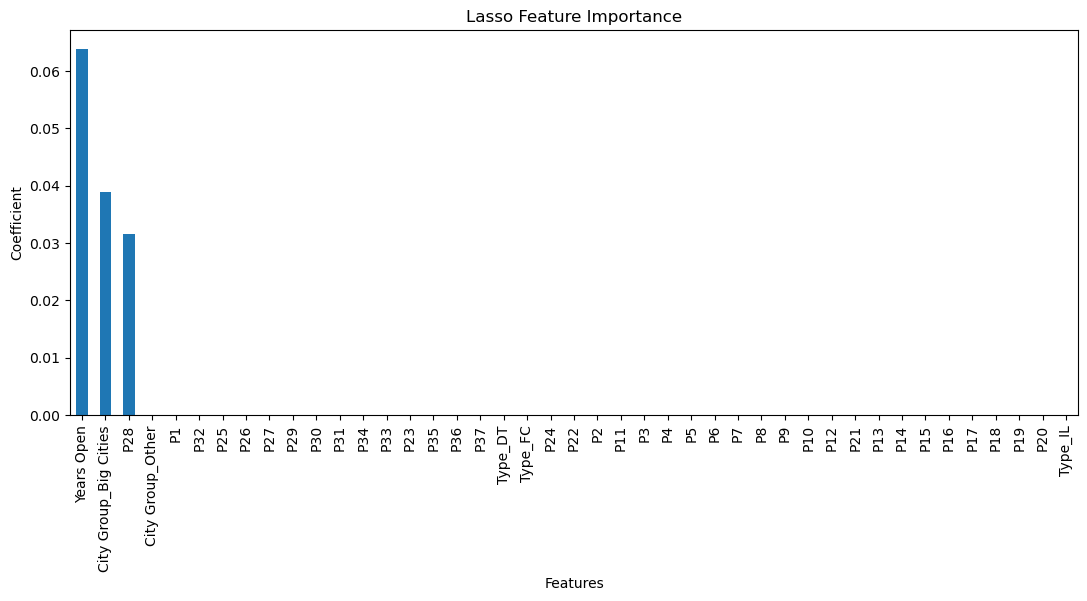

In [62]:
lasso_feature_coef = pd.Series(index=X_train.columns, data=np.abs(lasso_model.coef_))
sorted_coef = lasso_feature_coef.sort_values(ascending=False)

plt.figure(figsize=(13, 5))
plt.title('Lasso Feature Importance')
plt.xlabel('Features')
plt.ylabel('Coefficient')
sorted_coef.plot(kind='bar')
plt.show()

## ElasticNet

Will be using ElasticNetCV to automatically find the best alpha value based on cross validation

In [248]:
from sklearn.linear_model import ElasticNetCV, ElasticNet

elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], random_state=42)
elastic_model.fit(X_train, y_train)

store_scores.update({'ElasticNet Regression': print_scores(elastic_model, X_train, y_train, X_test, y_test)})

Train r2 score:  0.10059602828643566
Test r2 score:  0.10473339254880754
Train RMSE: 0.4363
Test RMSE: 0.5166


### ElasticNet Feature Importance

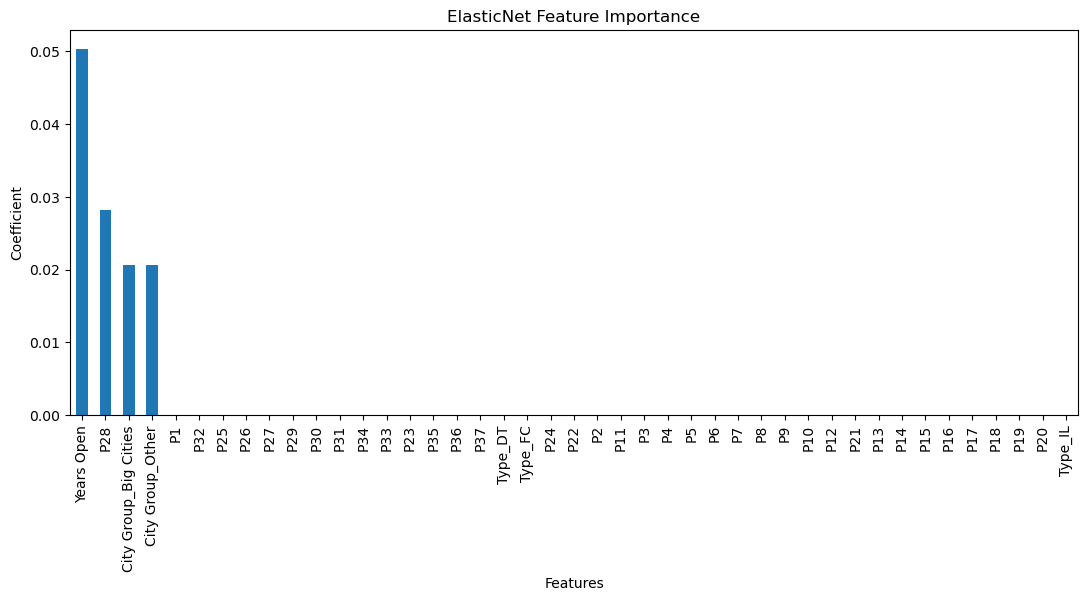

In [64]:
elastic_feature_coef = pd.Series(index=X_train.columns, data=np.abs(elastic_model.coef_))
sorted_coef = elastic_feature_coef.sort_values(ascending=False)

plt.figure(figsize=(13, 5))
plt.title('ElasticNet Feature Importance')
plt.xlabel('Features')
plt.ylabel('Coefficient')
sorted_coef.plot(kind='bar')
plt.show()

Ideal $r^2$ score is 1.

Ideal RMSE score is 0.

In [65]:
scores_df = pd.DataFrame.from_dict(store_scores, orient='index', columns=['Train R2', 'Test R2', 'Train RMSE', 'Test RMSE'])
scores_df

,Train R2,Test R2,Train RMSE,Test RMSE
Linear Regression,0.424122,-0.201554,0.349123,0.598522
Ridge Regression,0.102693,0.059171,0.435796,0.529619
Lasso Regression,0.108599,0.124444,0.434360,0.510917
ElasticNet Regression,0.100596,0.104733,0.436305,0.516636


The r^2 and RMSE are consistently underperformed across Ridge, Lasso and ElasticNet. The dataset is small and it can only be expected that it will overfit. However, note that among them, Lasso is performing the best with the lowest RMSE and highest r^2 score for the test set.

## KNN
Will be using GridSearchCV to automatically find the best n_neighbors value based on cross validation

In [262]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn_model = KNeighborsRegressor(n_neighbors=[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 30])
knn_regressor = GridSearchCV(knn_model, param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 30]}, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
knn_regressor.fit(X_train, y_train)
print(f'best n_neighbors: {knn_regressor.best_params_["n_neighbors"]}')

best n_neighbors: 21


In [263]:
knn_model = KNeighborsRegressor(n_neighbors=knn_regressor.best_params_["n_neighbors"])
knn_model.fit(X_train, y_train)


store_scores.update({'KNN Regression': print_scores(knn_model, X_train, y_train, X_test, y_test)})

Train r2 score:  0.068121706079313
Test r2 score:  0.0042472348289530615
Train RMSE: 0.4441
Test RMSE: 0.5449


## Random Forest
Will be using GridSearchCV to automatically find the best parameters based on cross validation

In [411]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [5, 10, 15, 20, 25],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [3, 4, 5, 6, 7],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': ['sqrt', 'log2', .2, .3, .4, .5, 1],

    
    # 'warm_start':[True],
    # 'bootstrap': [True],
    # 'oob_score': [True],
    # 'random_state': [42]
}

rf_model = RandomForestRegressor()
rf_regressor = GridSearchCV(rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
rf_regressor.fit(X_train, y_train)

print(f'best n_estimators: {rf_regressor.best_params_["n_estimators"]}')
print(f'best max_depth: {rf_regressor.best_params_["max_depth"]}')   
print(f'best min_samples_split: {rf_regressor.best_params_["min_samples_split"]}')
print(f'best min_samples_leaf: {rf_regressor.best_params_["min_samples_leaf"]}')
print(f'best max_features: {rf_regressor.best_params_["max_features"]}')


best n_estimators: 5
best max_depth: 10
best min_samples_split: 3
best min_samples_leaf: 4
best max_features: 0.3


In [413]:
rf_model = RandomForestRegressor(n_estimators=rf_regressor.best_params_["n_estimators"],
                                 max_depth=rf_regressor.best_params_["max_depth"], 
                                 min_samples_split=rf_regressor.best_params_["min_samples_split"], 
                                 min_samples_leaf=rf_regressor.best_params_["min_samples_leaf"], 
                                 max_features=rf_regressor.best_params_["max_features"]
) 
rf_model.fit(X_train, y_train)

store_scores.update({'Random Forest Regression': print_scores(rf_model, X_train, y_train, X_test, y_test)})

Train r2 score:  0.5427147454474346
Test r2 score:  0.1449713593808868
Train RMSE: 0.3111
Test RMSE: 0.5049


### Random Forest Feature Importance

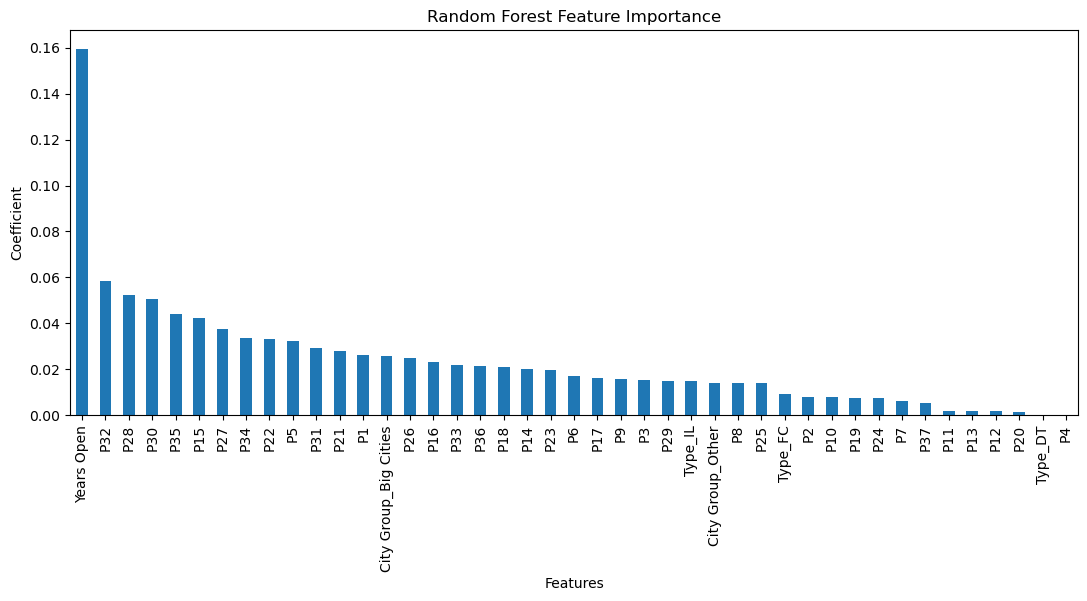

In [264]:
rf_feature_importance = pd.Series(index=X_train.columns, data=rf_model.feature_importances_)
sorted_coef = rf_feature_importance.sort_values(ascending=False)

plt.figure(figsize=(13, 5))
plt.title('Random Forest Feature Importance')
plt.xlabel('Features')
plt.ylabel('Coefficient')
sorted_coef.plot(kind='bar')
plt.show()

## LightGBM
Will be using GridSearchCV to automatically find the best parameters based on cross validation

In [155]:
import lightgbm as lgb

param_grid = {
    'learning_rate': [.005, .01, .05, .1, .5, .7, .9, .95, .99, 1],
    'n_estimators': [50, 100, 200, 300, 400, 450, 500]
}

lgb_model = lgb.LGBMRegressor()
lgb_regressor = GridSearchCV(lgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=-1)
lgb_regressor.fit(X_train, y_train)
print(f'best learning_rate: {lgb_regressor.best_params_["learning_rate"]}')
print(f'best n_estimators: {lgb_regressor.best_params_["n_estimators"]}')

best learning_rate: 0.01
best n_estimators: 100


In [265]:
lgb_model = lgb.LGBMRegressor(learning_rate=lgb_regressor.best_params_["learning_rate"],
                                n_estimators=lgb_regressor.best_params_["n_estimators"])
lgb_model.fit(X_train, y_train)

store_scores.update({'LightGBM Regression': print_scores(lgb_model, X_train, y_train, X_test, y_test)})

Train r2 score:  0.2595157006011939
Test r2 score:  0.11784267915290669
Train RMSE: 0.3959
Test RMSE: 0.5128


### LightGBM Feature Importance

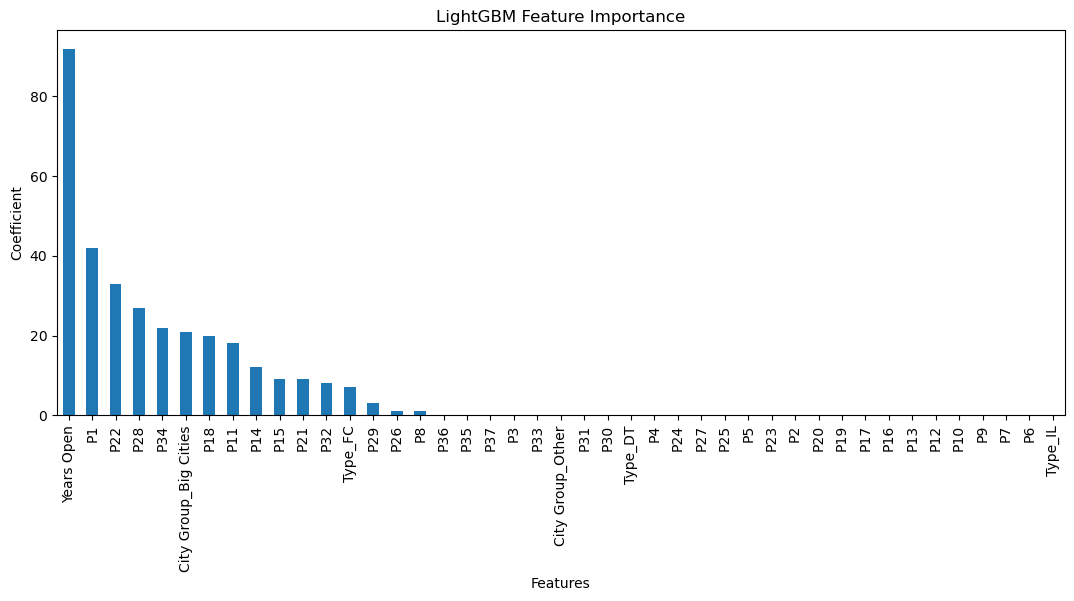

In [161]:
lgb_feature_importance = pd.Series(index=X_train.columns, data=lgb_model.feature_importances_)
sorted_coef = lgb_feature_importance.sort_values(ascending=False)

plt.figure(figsize=(13, 5))
plt.title('LightGBM Feature Importance')
plt.xlabel('Features')
plt.ylabel('Coefficient')
sorted_coef.plot(kind='bar')
plt.show()

## XGBoost
Will be using GridSearchCV to automatically find the best parameters based on cross validation

In [162]:
import xgboost as xgb

params_xgb = {
    'eta': [.03, .05, .07, .09, .1, .3, .5],
    'colsample_bytree': [.3, .4, .5, .6],
    'max_depth': [1, 2, 3, 4, 5, 6], # lower than default 6 to prevent overfitting
    'subsample': [.5], # was in documentation to prevent overfitting
    'n_estimators': [30, 70, 100, 200, 500, 700]
}

xgb_model = xgb.XGBRegressor()
xgb_regressor = GridSearchCV(xgb_model, param_grid=params_xgb, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_regressor.fit(X_train, y_train)
print(f'best eta: {xgb_regressor.best_params_["eta"]}')
print(f'best colsample_bytree: {xgb_regressor.best_params_["colsample_bytree"]}')
print(f'best max_depth: {xgb_regressor.best_params_["max_depth"]}')
print(f'best n_estimators: {xgb_regressor.best_params_["n_estimators"]}')

best eta: 0.1
best colsample_bytree: 0.4
best max_depth: 1
best n_estimators: 70


In [267]:
xgb_model = xgb.XGBRegressor(learning_rate=xgb_regressor.best_params_["eta"], 
                            max_depth=xgb_regressor.best_params_["max_depth"],
                           colsample_bytree=xgb_regressor.best_params_["colsample_bytree"], 
                           subsample=.5, 
                           n_estimators=xgb_regressor.best_params_["n_estimators"], n_jobs=-1)
xgb_model.fit(X_train, y_train)

store_scores.update({'XGBoost Regression': print_scores(xgb_model, X_train, y_train, X_test, y_test)})

Train r2 score:  0.3697770821776185
Test r2 score:  0.10583874306384322
Train RMSE: 0.3652
Test RMSE: 0.5163


### XGBoost Feature Importance

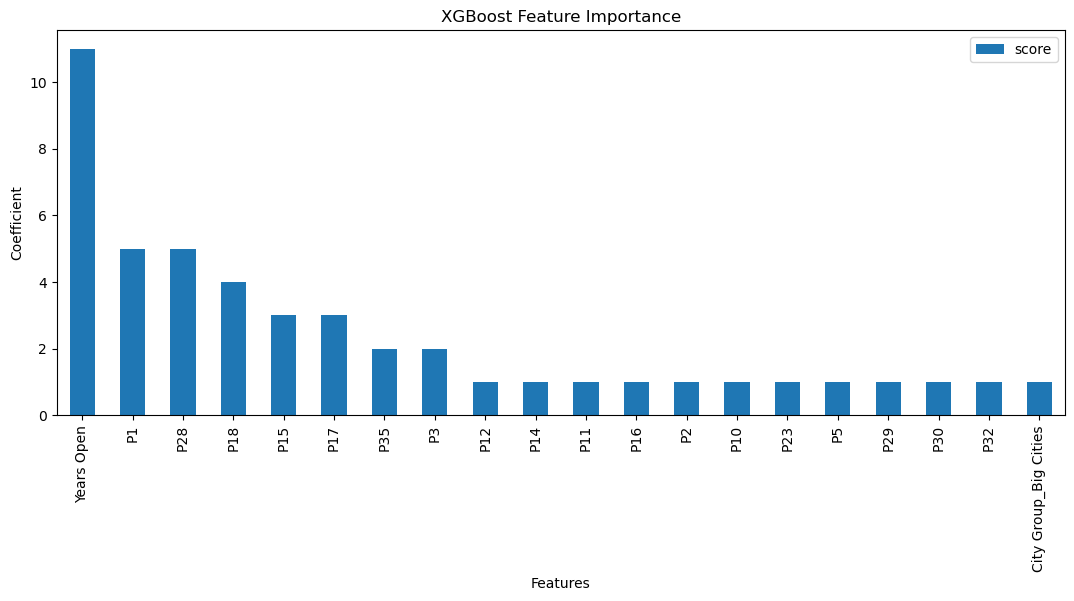

In [268]:
feature_important = xgb_model.get_booster().get_fscore()
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=['score']).sort_values(by = 'score', ascending=False)
data.plot(kind='bar', figsize = (13,5))
plt.title('XGBoost Feature Importance')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.show()

## Gradient Boosting
Will be using GridSearchCV to automatically find the best parameters based on cross validation

In [423]:
from sklearn.ensemble import GradientBoostingRegressor

params_gb = {
    'n_estimators': [5, 10, 15, 20, 25, 30, 40],
    'learning_rate': [.25, 0.2, 0.15, 0.1, 0.01],
    'max_depth': [1, 2, 3, 4, 5],
    'subsample': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    'min_samples_split': [1, 2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}
gb_model = GradientBoostingRegressor()
gb_regressor = GridSearchCV(gb_model, param_grid=params_gb, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
gb_regressor.fit(X_train, y_train)
print(f'best n_estimators: {gb_regressor.best_params_["n_estimators"]}')
print(f'best learning_rate: {gb_regressor.best_params_["learning_rate"]}')
print(f'best max_depth: {gb_regressor.best_params_["max_depth"]}')
print(f'best subsample: {gb_regressor.best_params_["subsample"]}')
print(f'best min_samples_split: {gb_regressor.best_params_["min_samples_split"]}')
print(f'best min_samples_leaf: {gb_regressor.best_params_["min_samples_leaf"]}')

/opt/homebrew/Caskroom/miniforge/base/envs/sklearn-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
52500 fits failed out of a total of 315000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
52500 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/sklearn-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/sklearn-env/lib/python3.9/site-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/opt/homebrew/Caskroom/miniforge/base/envs/sklearn

best n_estimators: 10
best learning_rate: 0.2
best max_depth: 1
best subsample: 0.4
best min_samples_split: 5
best min_samples_leaf: 5


/opt/homebrew/Caskroom/miniforge/base/envs/sklearn-env/lib/python3.9/site-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [        nan         nan         nan ... -0.20236389 -0.20293529
 -0.20191539]
  warnings.warn(


In [421]:
gb_model = GradientBoostingRegressor(n_estimators=gb_regressor.best_params_["n_estimators"],
                                    learning_rate=gb_regressor.best_params_["learning_rate"],
                                    max_depth=gb_regressor.best_params_["max_depth"],
                                    subsample=gb_regressor.best_params_["subsample"],
                                    min_samples_split=gb_regressor.best_params_["min_samples_split"],
                                    min_samples_leaf=gb_regressor.best_params_["min_samples_leaf"])
gb_model.fit(X_train, y_train)

store_scores.update({'Gradient Boosting Regression': print_scores(gb_model, X_train, y_train, X_test, y_test)})

Train r2 score:  0.5930632951123364
Test r2 score:  0.1793647779075508
Train RMSE: 0.2935
Test RMSE: 0.4946


### Gradient Boosting Feature Importance

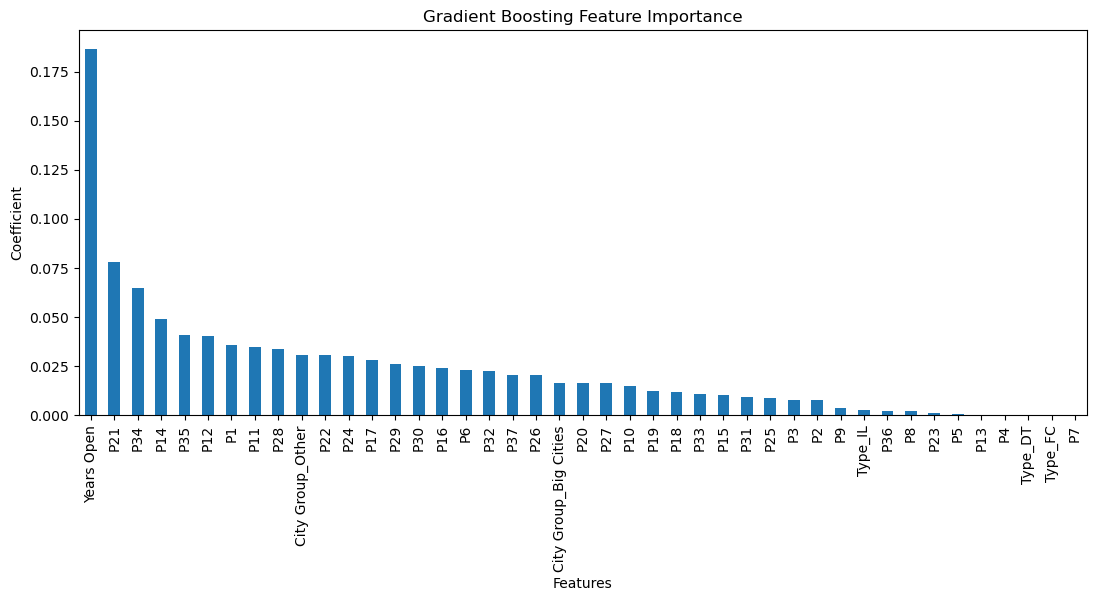

In [336]:
gb_feature_importance = pd.Series(index=X_train.columns, data=gb_model.feature_importances_)
sorted_coef = gb_feature_importance.sort_values(ascending=False)

plt.figure(figsize=(13, 5))
plt.title('Gradient Boosting Feature Importance')
plt.xlabel('Features')
plt.ylabel('Coefficient')
sorted_coef.plot(kind='bar')
plt.show()

## SVR
Will be using GridSearchCV to automatically find the best parameters based on cross validation

In [275]:
from sklearn.svm import SVR

params_svr = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [1, 2, 3, 4, 5],
    'gamma': ['scale', 'auto'],
    'C': [.05, 0.1, .5, 1, 10]
}

svr_model = SVR()
svr_regressor = GridSearchCV(svr_model, param_grid=params_svr, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
svr_regressor.fit(X_train, y_train)
print(f'best kernel: {svr_regressor.best_params_["kernel"]}')
print(f'best degree: {svr_regressor.best_params_["degree"]}')
print(f'best gamma: {svr_regressor.best_params_["gamma"]}')
print(f'best C: {svr_regressor.best_params_["C"]}')

best kernel: rbf
best degree: 1
best gamma: scale
best C: 0.05


In [277]:
svr_model = SVR(kernel=svr_regressor.best_params_["kernel"],
                degree=svr_regressor.best_params_["degree"],
                gamma=svr_regressor.best_params_["gamma"],
                C=svr_regressor.best_params_["C"])
svr_model.fit(X_train, y_train)

store_scores.update({'Support Vector Regression': print_scores(svr_model, X_train, y_train, X_test, y_test)})

Train r2 score:  0.10981919741243928
Test r2 score:  0.01529397941658317
Train RMSE: 0.4341
Test RMSE: 0.5418


## Neural Network

In [269]:
# from keras.models import Sequential
# from keras.layers import Dense, Dropout

# from keras.callbacks import EarlyStopping

# # early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')

# model = Sequential()
# model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1))

# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# # history = model.fit(X_train, y_train, epochs=1000, batch_size=128, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stop])
# history = model.fit(X_train, y_train, epochs=1000, batch_size=128, verbose=1, validation_data=(X_test, y_test))


In [270]:
# y_train_pred = model.predict(X_train)
# y_pred = model.predict(X_test)

# train_r2 = r2_score(y_train, y_train_pred)
# test_r2 = r2_score(y_test, y_pred)

# train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
# test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# print('Train r2 score: ', train_r2)
# print('Test r2 score: ', test_r2)
# print(f'Train RMSE: {train_rmse:.4f}')
# print(f'Test RMSE: {test_rmse:.4f}')

# plt.plot(history.history['loss'], label='train')

# plt.plot(history.history['val_loss'], label='test')

# plt.legend()

# plt.show()


## CatBoost

knowing that catboost performs a lot of feature engineering behind the scenes, attempt without much from me
working with 2 different versions of the data frame without any MICE imputation, or removal of City.
- one with just 3 of the top cities, with all other cities grouped into 'other' (`og_df` and `og_test_df`)
- one with all cities one-hot-encoded (`all_cities_df` and `all_cities_test_df`)

make 2 more versions with MICE imputation and City included with same conditions as above called (`mice_df` and `mice_test_df`) and (`mice_all_cities_df` and `mice_all_cities_test_df`) respectively

In [279]:
# knowing that catboost performs a lot of feature engineering behind the scenes, attempt without much from me
# attempt on original data frame without any MICE imputation, or removal of City
og_df = pd.read_csv('train.csv')
og_test_df = pd.read_csv('test.csv')

og_df['Open Date'] = pd.to_datetime(og_df['Open Date'])
og_test_df['Open Date'] = pd.to_datetime(og_test_df['Open Date'])
og_df['Days Open'] = (comp_date - og_df['Open Date']).dt.days
og_test_df['Days Open'] = (comp_date - og_test_df['Open Date']).dt.days
del og_df['Open Date']
del og_test_df['Open Date']
del og_df['Id']
del og_test_df['Id']

og_df['revenue'] = np.log1p(df['revenue'])

# copy og_df to all_cities_df
all_cities_df = og_df.copy()
all_cities_test_df = og_test_df.copy()
all_cities_df = pd.get_dummies(all_cities_df, columns=['City Group', 'Type', 'City'])
all_cities_test_df = pd.get_dummies(all_cities_test_df, columns=['City Group', 'Type', 'City'])

top_cities = list(og_df['City'].value_counts().head(3).index)
og_df['City'] = og_df['City'].apply(lambda x: x if x in top_cities else 'Other')
og_test_df['City'] = og_test_df['City'].apply(lambda x: x if x in top_cities else 'Other')
og_df = pd.get_dummies(og_df, columns=['City Group', 'Type', 'City'])
og_test_df = pd.get_dummies(og_test_df, columns=['City Group', 'Type', 'City'])

# MICE imputation on dataframe with only top 3 cities
mice_df = df.copy()
mice_test_df = test_df.copy()


#replace the P data with that of mice imputed data in original df and test_df
p_data = ['P'+str(i) for i in range(1,38)]
mice_df = mice_df.drop(p_data, axis=1)
mice_test_df = mice_test_df.drop(p_data, axis=1)

mice_df = pd.concat([mice_df, df[p_data]], axis=1)
mice_test_df = pd.concat([mice_test_df, test_df[p_data]], axis=1)


# will be replacing the P data with mice imputed data
mice_all_cities_df = all_cities_df.copy()
mice_all_cities_test_df = all_cities_test_df.copy()

# remove all P data from mice_all_cities_df
mice_all_cities_df = mice_all_cities_df.drop(p_data, axis=1)
mice_all_cities_test_df = mice_all_cities_test_df.drop(p_data, axis=1)

# replace with mice imputed data
mice_all_cities_df = pd.concat([mice_all_cities_df, mice_df[p_data]], axis=1)
mice_all_cities_test_df = pd.concat([mice_all_cities_test_df, mice_test_df[p_data]], axis=1)


#save as pickle
og_df.to_pickle('train_less_processed.pkl')
og_test_df.to_pickle('test_less_processed.pkl')
all_cities_df.to_pickle('train_all_less_processed.pkl')
all_cities_test_df.to_pickle('test_all_less_processed.pkl')
mice_df.to_pickle('train_mice_processed.pkl')
mice_test_df.to_pickle('test_mice_processed.pkl')
mice_all_cities_df.to_pickle('train_all_mice_processed.pkl')
mice_all_cities_test_df.to_pickle('test_all_mice_processed.pkl')

#Testing on original data frame, with only top 3 cities, and with all cities

# split into X and y
og_X = og_df.drop(['revenue'], axis=1)
og_y = og_df['revenue']

all_cities_X = all_cities_df.drop(['revenue'], axis=1)
all_cities_y = all_cities_df['revenue']

# split into train and test sets
og_X_train, og_X_test, og_y_train, og_y_test = train_test_split(og_X, og_y, test_size=0.2, random_state=42)
all_cities_X_train, all_cities_X_test, all_cities_y_train, all_cities_y_test = train_test_split(all_cities_X, all_cities_y, test_size=0.2, random_state=42)

In [286]:
og_scaler = StandardScaler()
og_X_train = og_scaler.fit_transform(og_X_train)
og_X_test = og_scaler.transform(og_X_test)

all_cities_scaler = StandardScaler()
all_cities_X_train = all_cities_scaler.fit_transform(all_cities_X_train)
all_cities_X_test = all_cities_scaler.transform(all_cities_X_test)

In [287]:
from catboost import CatBoostRegressor

params_cat = {
    'iterations': 10000,
    'eval_metric':'RMSE',
    'depth': 6,
    'l2_leaf_reg': 3,
    'learning_rate': 0.005,
    'od_type':'Iter',
    'od_wait':200,
    'silent':True
}

cat_model = CatBoostRegressor(**params_cat)
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

og_cat_model = CatBoostRegressor(**params_cat)
og_cat_model.fit(og_X_train, og_y_train, eval_set=(og_X_test, og_y_test), use_best_model=True)

all_cities_cat_model = CatBoostRegressor(**params_cat)
all_cities_cat_model.fit(all_cities_X_train, all_cities_y_train, eval_set=(all_cities_X_test, all_cities_y_test), use_best_model=True)

# print scores for both models
print('Scores for modified data')
store_scores.update({'CatBoost Regression': print_scores(cat_model, X_train, y_train, X_test, y_test)})
print('Scores for 3 less mod data')
# store_scores.update({'CatBoost Regression (Less Modified Data)': print_scores(og_cat_model, og_X_train, og_y_train, og_X_test, og_y_test)})
print_scores(og_cat_model, og_X_train, og_y_train, og_X_test, og_y_test)
print('Scores for all cities data')
# store_scores.update({'CatBoost Regression (All Cities Data)': print_scores(all_cities_cat_model, all_cities_X_train, all_cities_y_train, all_cities_X_test, all_cities_y_test)})
print_scores(all_cities_cat_model, all_cities_X_train, all_cities_y_train, all_cities_X_test, all_cities_y_test)

Scores for modified data
Train r2 score:  0.8940106366464263
Test r2 score:  0.1380104551740049
Train RMSE: 0.1498
Test RMSE: 0.5069
Scores for 3 less mod data
Train r2 score:  0.9197085180176111
Test r2 score:  0.2643943832565897
Train RMSE: 0.0081
Test RMSE: 0.0286
Scores for all cities data
Train r2 score:  0.8562995428179017
Test r2 score:  0.250231762297606
Train RMSE: 0.0108
Test RMSE: 0.0289


It's performing better than the other models, but still need to be wary of overfitting to the training set, since the test set is much larger.

### Catboost feature importance (Modified)

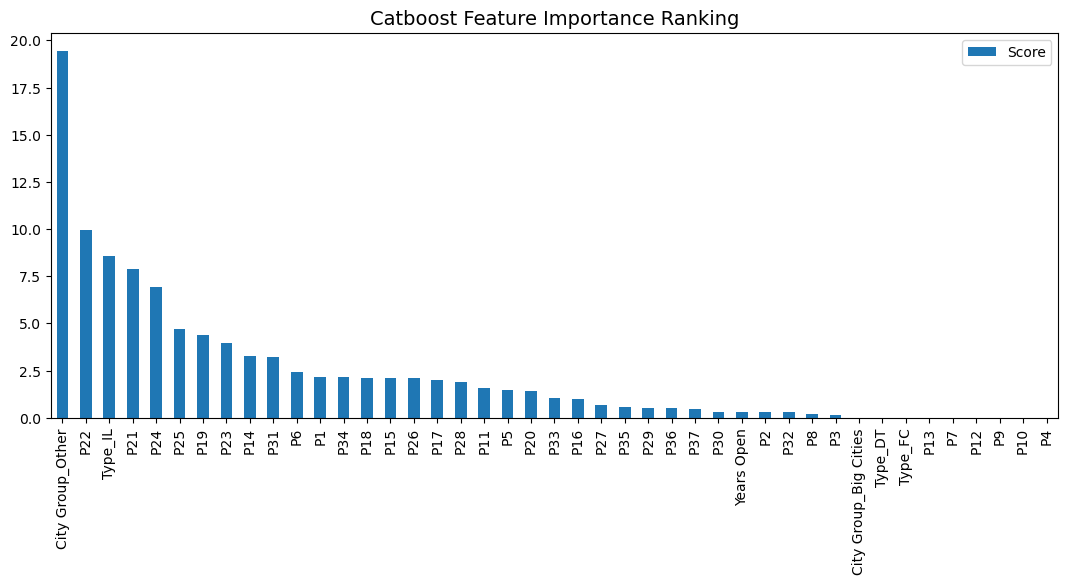

In [288]:
from catboost import Pool


feature_score = pd.DataFrame(list(zip(X.dtypes.index, cat_model.get_feature_importance(Pool(X, label=y, cat_features=None, weight=None, baseline=None,
                            thread_count=-1)))), columns=['Feature','Score'])

feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

plt.rcParams["figure.figsize"] = (13,5)
ax = feature_score.plot('Feature', 'Score', kind='bar')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')
plt.show()

### Catboost feature importance (Less Modified with top 3 cities)

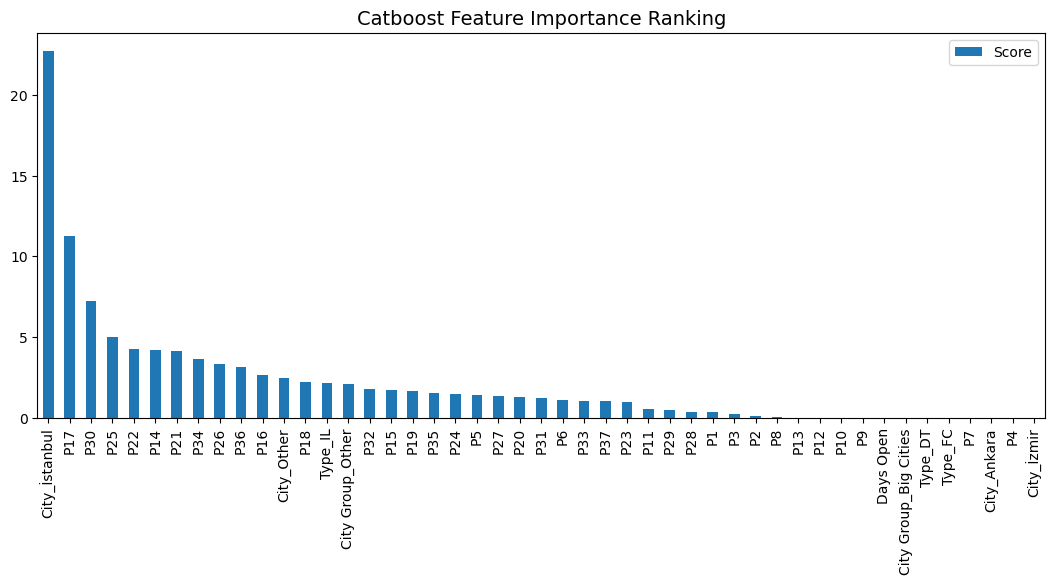

In [289]:
og_feature_score = pd.DataFrame(list(zip(og_X.dtypes.index, og_cat_model.get_feature_importance(Pool(og_X, label=og_y, cat_features=None, weight=None, baseline=None,
                            thread_count=-1)))), columns=['Feature','Score'])

og_feature_score = og_feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

plt.rcParams["figure.figsize"] = (13,5)
ax = og_feature_score.plot('Feature', 'Score', kind='bar')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')
plt.show()

### Catboost feature importance (Less Modified with all cities)

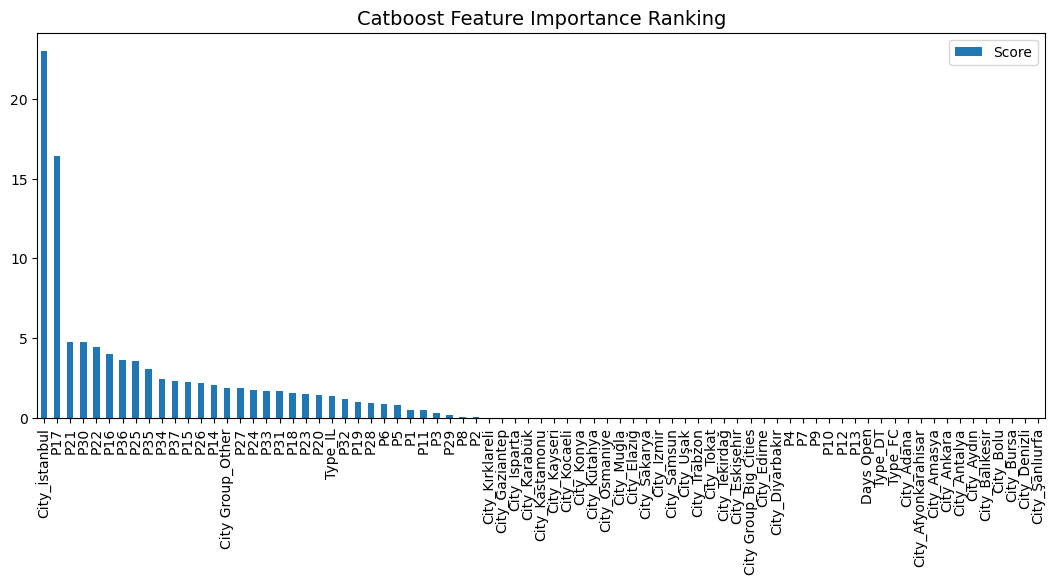

In [290]:
all_cities_feature_score = pd.DataFrame(list(zip(all_cities_X.dtypes.index, all_cities_cat_model.get_feature_importance(Pool(all_cities_X, label=all_cities_y, cat_features=None, weight=None, baseline=None,
                            thread_count=-1)))), columns=['Feature','Score'])

all_cities_feature_score = all_cities_feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

plt.rcParams["figure.figsize"] = (13,5)
ax = all_cities_feature_score.plot('Feature', 'Score', kind='bar')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')
plt.show()

Made me realize that I should have done more effective feature engineering. The most important features are the ones that I dropped because they had too many elements. I will try to do better feature engineering in the future.

In [310]:
#print store_scores as table
scores_df = pd.DataFrame.from_dict(store_scores, orient='index', columns=['Train r2', 'Test r2', 'Train RMSE', 'Test RMSE'])
scores_df

,Train r2,Test r2,Train RMSE,Test RMSE
Linear Regression,0.424122,-0.201554,0.349123,0.598522
Ridge Regression,0.102693,0.059171,0.435796,0.529619
Lasso Regression,0.108599,0.124444,0.434360,0.510917
ElasticNet Regression,0.100596,0.104733,0.436305,0.516636
KNN Regression,0.068122,0.004247,0.444112,0.544859
Random Forest Regression,0.589205,0.237764,0.294867,0.476709
LightGBM Regression,0.259516,0.117843,0.395887,0.512839
XGBoost Regression,0.369777,0.105839,0.365225,0.516317
XGBoost Regression with early stopping,0.248957,0.091078,0.398700,0.520561
Gradient Boosting Regression,0.448415,0.195444,0.341680,0.489763


Let's stack the best models together and see if we can get a better result.

In [293]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

base_models = [('random_forest', rf_model),
               ('catboost', cat_model),
               ('xgb', xgb_model)
]

final_estimator = lasso_model

stacking_model = StackingRegressor(estimators=base_models, final_estimator=final_estimator, cv=10)

stacking_model.fit(X_train, y_train)

store_scores.update({'Stacking Regression(rf, cat, xgb)': print_scores(stacking_model, X_train, y_train, X_test, y_test)})

Train r2 score:  0.6052479963974999
Test r2 score:  0.09223085299696965
Train RMSE: 0.2891
Test RMSE: 0.5202


Try another stacking order

In [294]:
new_base_models = [('xgb', xgb_model),
                   ('catboost', cat_model),
                   ('random_forest', rf_model)
]
final_estimator = lasso_model

new_stacking_model = StackingRegressor(estimators=new_base_models, final_estimator=final_estimator, cv=10)

new_stacking_model.fit(X_train, y_train)

store_scores.update({'Stacking Regression(xgb, cat, rf)': print_scores(new_stacking_model, X_train, y_train, X_test, y_test)})

Train r2 score:  0.6057383263879448
Test r2 score:  0.09560547818602005
Train RMSE: 0.2889
Test RMSE: 0.5193


Interesting to note that the order of the the models in the stacker doesn't seem to matter much. The scores are very similar.

In [339]:
neww_base_models = [('random_forest', rf_model),
                    ('gradient_boosting', gb_model),
                    ('catboost', cat_model)
]
final_estimator = lasso_model
neww_stacking_model = StackingRegressor(estimators=neww_base_models, final_estimator=final_estimator, cv=10)

neww_stacking_model.fit(X_train, y_train)

store_scores.update({'Stacking Regression(rf, gb, cat)': print_scores(neww_stacking_model, X_train, y_train, X_test, y_test)})

Train r2 score:  0.6929631826804844
Test r2 score:  0.09802430019058517
Train RMSE: 0.2549
Test RMSE: 0.5186


In [406]:
# Attempt another stack based on the scores from Kaggle
kaggle_base_models = [('gradient_boosting', gb_model),
                        ('random_forest', rf_model),
                        ('knn', knn_model)
]

final_estimator = lgb_model
kaggle_stacking_model = StackingRegressor(estimators=kaggle_base_models, final_estimator=final_estimator, cv=10)

kaggle_stacking_model.fit(X_train, y_train)

store_scores.update({'Stacking Regression(gb, rf, knn)': print_scores(kaggle_stacking_model, X_train, y_train, X_test, y_test)})


# run above for 1 hour, maximizing the r2 and minimizing the rmse and keeping the best model
for 

Train r2 score:  0.15688139742830076
Test r2 score:  0.017389110005071595
Train RMSE: 0.4224
Test RMSE: 0.5413


In [338]:
#print store_scores as table
scores_df = pd.DataFrame.from_dict(store_scores, orient='index', columns=['Train r2', 'Test r2', 'Train RMSE', 'Test RMSE'])
scores_df


,Train r2,Test r2,Train RMSE,Test RMSE
Linear Regression,0.424122,-0.201554,0.349123,0.598522
Ridge Regression,0.102693,0.059171,0.435796,0.529619
Lasso Regression,0.108599,0.124444,0.434360,0.510917
ElasticNet Regression,0.100596,0.104733,0.436305,0.516636
KNN Regression,0.068122,0.004247,0.444112,0.544859
Random Forest Regression,0.589205,0.237764,0.294867,0.476709
LightGBM Regression,0.259516,0.117843,0.395887,0.512839
XGBoost Regression,0.369777,0.105839,0.365225,0.516317
Gradient Boosting Regression,0.718352,0.211434,0.244156,0.484872
Support Vector Regression,0.109819,0.015294,0.434063,0.541828


In [312]:
scores_df = pd.DataFrame.from_dict(store_scores, orient='index', columns=['Train r2', 'Test r2', 'Train RMSE', 'Test RMSE'])

# print best test r2 and the model that produced it
print(f'Best test r2: {scores_df["Test r2"].max():.4f}')
print(f'Best model: {scores_df["Test r2"].idxmax()}')

# print best test rmse and the model that produced it
print(f'Best test rmse: {scores_df["Test RMSE"].min():.4f}')
print(f'Best model: {scores_df["Test RMSE"].idxmin()}')

Best test r2: 0.2378
Best model: Random Forest Regression
Best test rmse: 0.4767
Best model: Random Forest Regression


In [341]:
# save all models as pickle in folder 'models'
with open('models/lin_model.pkl', 'wb') as f:
    pickle.dump(lin_model, f)
with open('models/ridge_model.pkl', 'wb') as f:
    pickle.dump(ridge_model, f)
with open('models/lasso_model.pkl', 'wb') as f:
    pickle.dump(lasso_model, f)
with open('models/elastic_model.pkl', 'wb') as f:
    pickle.dump(elastic_model, f)
with open('models/knn_model.pkl', 'wb') as f:
    pickle.dump(knn_model, f)
with open('models/rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
with open('models/lgb_model.pkl', 'wb') as f:
    pickle.dump(lgb_model, f)
with open('models/xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)
with open('models/gb_model.pkl', 'wb') as f:
    pickle.dump(gb_model, f)
with open('models/svr_model.pkl', 'wb') as f:
    pickle.dump(svr_model, f)
with open('models/cat_model.pkl', 'wb') as f:
    pickle.dump(cat_model, f)
with open('models/og_cat_model.pkl', 'wb') as f: # notes that this uses a different dataframe
    pickle.dump(og_cat_model, f)
with open('models/all_cities_cat_model.pkl', 'wb') as f: # notes that this uses a different dataframe
    pickle.dump(all_cities_cat_model, f)
with open('models/stacking_model.pkl', 'wb') as f:
    pickle.dump(stacking_model, f)
with open('models/new_stacking_model.pkl', 'wb') as f:
    pickle.dump(new_stacking_model, f)
with open('models/neww_stacking_model.pkl', 'wb') as f:
    pickle.dump(neww_stacking_model, f)
with open('models/kaggle_stacking_model.pkl', 'wb') as f:
    pickle.dump(kaggle_stacking_model, f)

Submission to Kaggle:


In [422]:
# submission = pd.DataFrame(columns=['Prediction'], index=test_df.index, data=np.expm1(lin_model.predict(test_df)))
# submission.to_csv('lin_submission.csv', index_label='Id')

# submission['Prediction'] = np.expm1(ridge_model.predict(test_df))
# submission.to_csv('ridge_submission.csv', index_label='Id')

# submission['Prediction'] = np.expm1(lasso_model.predict(test_df))
# submission.to_csv('lasso_submission.csv', index_label='Id')

# submission['Prediction'] = np.expm1(elastic_model.predict(test_df))
# submission.to_csv('elastic_submission.csv', index_label='Id')

# submission['Prediction'] = np.expm1(knn_model.predict(test_df))
# submission.to_csv('knn_submission.csv', index_label='Id')

# submission['Prediction'] = np.expm1(rf_model.predict(test_df))
# submission.to_csv('rf_submission.csv', index_label='Id')

# submission['Prediction'] = np.expm1(lgb_model.predict(test_df))
# submission.to_csv('lgb_submission.csv', index_label='Id')

# submission['Prediction'] = np.expm1(xgb_model.predict(test_df))
# submission.to_csv('xgb_submission.csv', index_label='Id')

# submission['Prediction'] = np.expm1(gb_model.predict(test_df))
# submission.to_csv('gb_submission.csv', index_label='Id')

# submission['Prediction'] = np.expm1(svr_model.predict(test_df))
# submission.to_csv('svr_submission.csv', index_label='Id')

# submission['Prediction'] = np.expm1(cat_model.predict(test_df))
# submission.to_csv('cat_submission.csv', index_label='Id')

# submission['Prediction'] = np.expm1(og_cat_model.predict(og_test_df))
# submission.to_csv('og_cat_submission.csv', index_label='Id')

# submission['Prediction'] = np.expm1(all_cities_cat_model.predict(all_cities_test_df))
# submission.to_csv('all_cities_cat_submission.csv', index_label='Id')

# submission['Prediction'] = np.expm1(stacking_model.predict(test_df))
# submission.to_csv('stacking_submission.csv', index_label='Id')

# submission['Prediction'] = np.expm1(new_stacking_model.predict(test_df))
# submission.to_csv('new_stacking_submission.csv', index_label='Id')

# submission['Prediction'] = np.expm1(neww_stacking_model.predict(test_df))
# submission.to_csv('neww_stacking_submission.csv', index_label='Id')


submission = pd.DataFrame(columns=['Prediction'], index=test_df.index, data=np.expm1(lin_model.predict(test_df)))
submission.to_csv('submission/lin_submission.csv', index_label='Id')

submission['Prediction'] = np.expm1(ridge_model.predict(test_df))
submission.to_csv('submission/ridge_submission.csv', index_label='Id')

submission['Prediction'] = np.expm1(lasso_model.predict(test_df))
submission.to_csv('submission/lasso_submission.csv', index_label='Id')

submission['Prediction'] = np.expm1(elastic_model.predict(test_df))
submission.to_csv('submission/elastic_submission.csv', index_label='Id')

submission['Prediction'] = np.expm1(knn_model.predict(test_df))
submission.to_csv('submission/knn_submission.csv', index_label='Id')

submission['Prediction'] = np.expm1(rf_model.predict(test_df))
submission.to_csv('submission/rf_submission.csv', index_label='Id')

submission['Prediction'] = np.expm1(lgb_model.predict(test_df))
submission.to_csv('submission/lgb_submission.csv', index_label='Id')

submission['Prediction'] = np.expm1(xgb_model.predict(test_df))
submission.to_csv('submission/xgb_submission.csv', index_label='Id')

submission['Prediction'] = np.expm1(gb_model.predict(test_df))
submission.to_csv('submission/gb_submission.csv', index_label='Id')

submission['Prediction'] = np.expm1(svr_model.predict(test_df))
submission.to_csv('submission/svr_submission.csv', index_label='Id')

submission['Prediction'] = np.expm1(cat_model.predict(test_df))
submission.to_csv('submission/cat_submission.csv', index_label='Id')

submission['Prediction'] = np.expm1(og_cat_model.predict(og_test_df))
submission.to_csv('submission/og_cat_submission.csv', index_label='Id')

submission['Prediction'] = np.expm1(all_cities_cat_model.predict(all_cities_test_df))
submission.to_csv('submission/all_cities_cat_submission.csv', index_label='Id')

submission['Prediction'] = np.expm1(stacking_model.predict(test_df))
submission.to_csv('submission/stacking_submission.csv', index_label='Id')

submission['Prediction'] = np.expm1(new_stacking_model.predict(test_df))
submission.to_csv('submission/new_stacking_submission.csv', index_label='Id')

submission['Prediction'] = np.expm1(neww_stacking_model.predict(test_df))
submission.to_csv('submission/neww_stacking_submission.csv', index_label='Id')

In [344]:
submission['Prediction'] = np.expm1(kaggle_stacking_model.predict(test_df))
submission.to_csv('submission/kaggle_stacking_submission.csv', index_label='Id')
